<img src=https://www.evalueserve.com/wp-content/themes/wpapp/assets/img/logo.png width=200 align=right>
<img src=https://www.python.org/static/community_logos/python-logo.png width=200 align=left>

<h1><center> Python - Data Scientist Program</center></h1>
<h4><center> Autor: Adrian Sanhueza </center></h4>
<h4><center> Date: December 2019</center></h4>





# 8 - Introduction to Natural Laguage Processing (NLP) (Cont.)

In this session we will learn about some packages developed upon NLTK, giving new features and a more intuitive way to extract more insights from text

## Session Content
*While going through the content do not forget to follow PEP 8 guidelines.*

## TextBlob

TextBlob is a python library for NLP. It provides a simple API for common NLP tasks such as part of speech tagging, noun phrase extraction, sentiment analysis, classification, translation, among others

In case you don't have it installed on your VDI, firt of all you will have to install it.

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

wiki = TextBlob("Python is a high-level, general-purpose programming language.")

### Part of speech tagging

Part of speech tagging can be easily accessed through the 'tags' method.

In [ ]:
!pip install nltk
import nltk
nltk.download()

In [ ]:
wiki.tags

### Noun phrase extraction

In the same way, noun phrases can be accessed through the 'noun_phrases' method.

In [ ]:
wiki.noun_phrases

### Sentiment analysis

One of the most used properties on TextBlob is the Sentiment Analysis. This method returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float number within the range [-1.0,1.0] (-1 means 'very negative' and 1 means 'very positive'). The subjectivity score is a float number witin the range [0.0,1.0] (0 means 'very objective' and 1 means 'very subjective')

In [ ]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
testimonial.sentiment

In [ ]:
testimonial.sentiment.polarity

### Tokenization

TextBlob allows you to easily break text into words or sentences.

In [ ]:
zen = TextBlob("Beautiful is better than ugly. "
                "Explicit is better than implicit. "
                "Simple is better than complex.")

In [ ]:
zen.words

In [ ]:
zen.sentences

Sentence objects have the same properties and methods as TextBlobs objects.

In [ ]:
for sentence in zen.sentences:
    print(sentence.sentiment)

### Words inflection and Lemmatization

Each word in TextBlob.words or Sentence.words is a Word object (a subclass of unicode) with useful methods, e.g. for word inflection.

In [ ]:
sentence = TextBlob('Use 4 spaces per indentation level.')
sentence.words

In [ ]:
sentence.words[2].singularize()

In [ ]:
sentence.words[-1].pluralize()

### WordList

A WordList objetc is just a Python list with additional methods available.

In [ ]:
animals = TextBlob("cat dog octopus")
animals.words

In [ ]:
animals.words.pluralize()

### Spelling Correction

You can use the 'correct()' method in order to attempt spelling correction. It's not 100% accurate but it's a good point of start.

In [ ]:
b = TextBlob("I havv goood speling!")
print(b.correct())

Word objects have a spellcheck() method that returns a list of (word, confidence) tuples with spelling suggestions

In [ ]:
from textblob import Word
w = Word('falibility')
w.spellcheck()

### Translation and Language Detection

This is a really cool feature of TextBlob. This functionality is powered by the Google Translate API. Thanks to this, TextBlob can easily translate text into different languages.

In [ ]:
en_blob = TextBlob(u'Simple is better than complex.')
en_blob.translate(to='es')

If you don't specified the language, TextBlob will try to detect the language.
In order to avoid missmatching with other languages, you can specify the language of the text

In [ ]:
chinese_blob = TextBlob(u"美丽优于丑陋")
chinese_blob.translate(from_lang="zh-CN", to='en')

You can also use the method 'detect_language()' in order to get a string with the detected language.

In [ ]:
b = TextBlob(u"بسيط هو أفضل من مجمع")
b.detect_language()

### N-grams

The method 'ngrams()' will return a lsit of tuples of N successive words.

In [ ]:
blob = TextBlob("Now is better than never.")
blob.ngrams(n=2)

## Spacy

spaCy is a library for advanced Natural Language Processing in Python and Cython. It's built on the very latest research, and was designed from day one to be used in real products. spaCy comes with pretrained statistical models and word vectors, and currently supports tokenization for 50+ languages. It features state-of-the-art speed, convolutional neural network models for tagging, parsing and named entity recognition and easy deep learning integration. It's commercial open-source software, released under the MIT license.

First of all you need to install the package and also 1+ models to use with. In this case we are going to download english and spanish models.

In [ ]:
!pip install spacy
!pip install spacy-lookups-data
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm

In [ ]:
import spacy

In [ ]:
import es_core_news_sm as nlp

In [ ]:
spacy.load('es_core_news_sm')

### Linguistic features

Spacy brings a lot of different linguistic features ready to use. The only thing you need to do is to install the model of the language you want to use.

### Part of speech tagging

After tokenization, spaCy can parse and tag a given Doc. This is where the statistical model comes in, which enables spaCy to make a prediction of which tag or label most likely applies in this context. A model consists of binary data and is produced by showing a system enough examples for it to make predictions that generalize across the language – for example, a word following “the” in English is most likely a noun.

In [4]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion A3")

In [5]:
for token in doc:
    print(token.text,"-", token.lemma_,"-", token.pos_,"-", token.tag_,"-", token.dep_,"-",
            token.shape_,"-", token.is_alpha,"-", token.is_stop)

Apple - Apple - PROPN - NNP - nsubj - Xxxxx - True - False
is - be - AUX - VBZ - aux - xx - True - True
looking - look - VERB - VBG - ROOT - xxxx - True - False
at - at - ADP - IN - prep - xx - True - True
buying - buy - VERB - VBG - pcomp - xxxx - True - False
U.K. - U.K. - PROPN - NNP - compound - X.X. - False - False
startup - startup - NOUN - NN - dobj - xxxx - True - False
for - for - ADP - IN - prep - xxx - True - True
$ - $ - SYM - $ - quantmod - $ - False - False
1 - 1 - NUM - CD - compound - d - False - False
billion - billion - NUM - CD - nummod - xxxx - True - False
A3 - a3 - NOUN - NN - pobj - Xd - False - False


### Noun chunks

Noun chunks are “base noun phrases” – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, “the lavish green grass” or “the world’s largest tech fund”. To get the noun chunks in a document, simply iterate over Doc.noun_chunks

In [1]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Autonomous cars shift insurance liability toward manufacturers")
for chunk in doc.noun_chunks:
    print(chunk.text,"-", chunk.root.text,"-", chunk.root.dep_,"-",
            chunk.root.head.text)

Autonomous cars - cars - nsubj - shift
insurance liability - liability - dobj - shift
manufacturers - manufacturers - pobj - toward


### Named Entity Recognition

spaCy features an extremely fast statistical entity recognition system, that assigns labels to contiguous spans of tokens. The default model identifies a variety of named and numeric entities, including companies, locations, organizations and products. You can add arbitrary classes to the entity recognition system, and update the model with new examples.

In [6]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text,"-", ent.start_char,"-", ent.end_char,"-", ent.label_)

Apple - 0 - 5 - ORG
U.K. - 27 - 31 - GPE
$1 billion - 44 - 54 - MONEY


### Accessing entity annotations

The standard way to access entity annotations is the doc.ents property, which produces a sequence of Span objects. The entity type is accessible either as a hash value or as a string, using the attributes ent.label and ent.label_. The Span object acts as a sequence of tokens, so you can iterate over the entity or index into it. You can also get the text form of the whole entity, as though it were a single token.

In [7]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("San Francisco considers banning sidewalk delivery robots")

# document level
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]
print('Document level')
print(ents)

# token level
ent_san = [doc[0].text, doc[0].ent_iob_, doc[0].ent_type_]
ent_francisco = [doc[1].text, doc[1].ent_iob_, doc[1].ent_type_]
print('Token level')
print(ent_san)  # ['San', 'B', 'GPE']
print(ent_francisco)  # ['Francisco', 'I', 'GPE']

Document level
[('San Francisco', 0, 13, 'GPE')]
Token level
['San', 'B', 'GPE']
['Francisco', 'I', 'GPE']


### Tokenization

Tokenization is the task of splitting a text into meaningful segments, called tokens. The input to the tokenizer is a unicode text, and the output is a Doc object. To construct a Doc object, you need a Vocab instance, a sequence of word strings, and optionally a sequence of spaces booleans, which allow you to maintain alignment of the tokens into the original string.

import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text)

### If you want to go deep into Spacy, you are free to go and visit the documentation and see all other amazing features Spacy has for you !

## Sparse Matrix
When you prepare a Bag of words model, a sparse matrix is performed. It is a matrix that is comprised of mostly zero values.

### Space Complexity

Very large matrices require a lot of memory, and some very large matrices that we wish to work with are sparse.

### Time Complexity

Assuming a very large sparse matrix can be fit into memory, we will want to perform operations on this matrix.

Simply, if the matrix contains mostly zero-values, i.e. no data, then performing operations across this matrix may take a long time where the bulk of the computation performed will involve adding or multiplying zero values together.

#  Modeling using NLP

## Case Scenario

Suppose you were selected to work in a project to determine if an IMDB movie review is positive or negative based on a critic (text).

As entry, we receive a dataset which contains both features, the text considering the film review an its proper output.


In [48]:
# Importing the libraries
import pandas as pd
import re #Has some great tools to clean text
import nltk #Library that contains a lot of different tools to perform NLP
#nltk.download('stopwords')



In [49]:
# Importing the dataset
import os
os.getcwd()
dataset = pd.read_csv('../DSP/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3, encoding = 'unicode_escape')

In [50]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [55]:
# Cleaning the texts

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = [] #Intialization of a new list for the 1000 reviews (corpus: collection of text)

for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) #Removes all but letters (and Capitals)
    review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) #For reversing the process (list -> string)
    corpus.append(review) #Generate a list of one string per observation

In [56]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
!pip install tabulate
from tabulate import tabulate
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [57]:
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer #Class that allows tokenization

cv = CountVectorizer(max_features = 1000) #Keepong the 1000 more frequent words

X = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix

y = dataset.iloc[:, 1].values #Defining our response variable

In [58]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = classifier_nb.predict(X_test)
lr_y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)



[[54 43]
 [12 91]]
[[76 21]
 [36 67]]


No Skill: ROC AUC=0.500
Naive Bayes: ROC AUC=0.720
Logistic: ROC AUC=0.840


,threshold,tpr,fpr
0,1,0.0,0.0
1,0,1.0,1.0


,threshold,tpr,fpr
0,2.0,0.000000,0.000000
1,1.0,0.883495,0.443299
2,0.0,1.000000,1.000000


,threshold,tpr,fpr
0,0.997517,0.009709,0.000000
1,0.804837,0.339806,0.000000
2,0.802012,0.339806,0.010309
3,0.743756,0.398058,0.010309
4,0.736766,0.398058,0.020619
5,0.708489,0.466019,0.020619
6,0.707769,0.466019,0.030928
7,0.670720,0.485437,0.030928
8,0.651006,0.485437,0.051546
9,0.638650,0.524272,0.051546


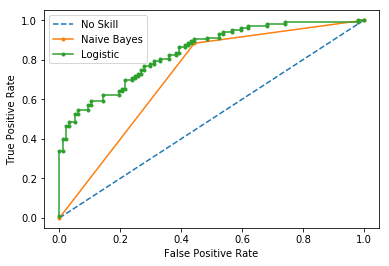

Sensitivity: 0.8252427184466019
Specificity: 0.6185567010309279
Sensitivity: 0.6504854368932039
Specificity: 0.7835051546391752
Sensitivity: 0.33980582524271846
Specificity: 0.9896907216494846


In [69]:
# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: ROC AUC=%.3f' % (nb_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_probs)

#get roc curve metrics
from IPython.display import display

ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)


# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
    print('Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
    
evaluate_threshold(0.357685)
evaluate_threshold(0.5)
evaluate_threshold(0.75)
